<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is02_regulalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.087e+01, tolerance: 4.286e-02
  model = cd_fast.enet_coordinate_descent(


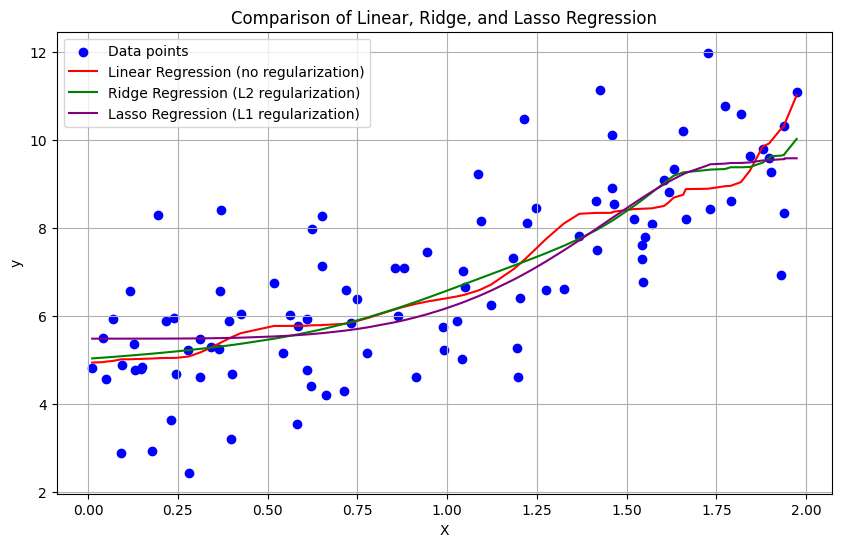

Linear Regression coefficients: [[-4.48529290e+00  8.99249953e+01 -3.35805850e+02 -3.32055080e+03
   3.59816430e+04 -1.51836603e+05  3.69933720e+05 -5.82329909e+05
   6.21712230e+05 -4.59055405e+05  2.34296776e+05 -8.09639498e+04
   1.80277263e+04 -2.32532505e+03  1.31413308e+02]]
Ridge Regression coefficients: [[ 0.56794809  0.36504499  0.2519563   0.22744803  0.22168044  0.17912876
   0.0730356  -0.08309457 -0.22558537 -0.2494756  -0.06780147  0.24889139
   0.30849361 -0.35455224  0.0843322 ]]
Lasso Regression coefficients: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.63597169e-01
  4.94514947e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.77242879e-03 -6.61663151e-03 -1.56577896e-03 -1.84555951e-04
  4.45734417e-05  1.66253344e-04  1.17453871e-04]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic high-dimensional data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * 1.5  # Linear relationship with noise

# Create polynomial features (up to 15th degree to make it complex)
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Apply standard Linear Regression (no regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred_linear = lin_reg.predict(X_poly)

# Apply Ridge Regression (L2 regularization)
ridge_reg = Ridge(alpha=1.0)  # L2 regularization (alpha = 1)
ridge_reg.fit(X_poly, y)
y_pred_ridge = ridge_reg.predict(X_poly)

# Apply Lasso Regression (L1 regularization)
lasso_reg = Lasso(alpha=0.1)  # L1 regularization (alpha = 0.1)
lasso_reg.fit(X_poly, y)
y_pred_lasso = lasso_reg.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')

# Sort for better visual clarity
X_sorted = np.sort(X, axis=0)
plt.plot(X_sorted, np.sort(y_pred_linear, axis=0), color='red', label='Linear Regression (no regularization)')
plt.plot(X_sorted, np.sort(y_pred_ridge, axis=0), color='green', label='Ridge Regression (L2 regularization)')
plt.plot(X_sorted, np.sort(y_pred_lasso, axis=0), color='purple', label='Lasso Regression (L1 regularization)')

plt.title('Comparison of Linear, Ridge, and Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Compare regression coefficients
print(f"Linear Regression coefficients: {lin_reg.coef_}")
print(f"Ridge Regression coefficients: {ridge_reg.coef_}")
print(f"Lasso Regression coefficients: {lasso_reg.coef_}")
